In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from functions import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
url1 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_demo.txt'
url2 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_experiment_clients.txt'
url3 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_web_data_pt_1.txt'
url4 = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data\raw\df_final_web_data_pt_2.txt'

df_final_demo = pd.read_csv(url1)
df_final_experiment_clients = pd.read_csv(url2)
df_web_data_1 = pd.read_csv(url3)
df_web_data_2 = pd.read_csv(url4)

In [28]:
df_final_demo
df_final_experiment_clients
df_web_data_1
df_web_data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## Try to PCA for get a real value for NaN

In [29]:
web_data_total = pd.concat([df_web_data_1, df_web_data_2], ignore_index=True)

demo_experiment_final = pd.merge(
    df_final_demo,
    df_final_experiment_clients[['client_id', 'Variation']],
    on = 'client_id',
    how = 'left'
)

demo_experiment_final


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [30]:
web_data_total['client_id'] = web_data_total['client_id'].astype(str)

# Agrupar por client_id sin crear índices nuevos o modificar IDs
web_data_grouped = web_data_total.groupby('client_id', as_index=False).agg(
    num_steps=('process_step', 'count'),  # Número de pasos totales
    confirm=('process_step', lambda x: 1 if 'confirm' in x.values else 0)  # Si llega al paso 'confirm'
)

In [31]:
id_anomalies = web_data_grouped[~web_data_grouped['client_id'].isin(web_data_total['client_id'])]

print(f"IDs anomalies: {len(id_anomalies)}")



IDs anomalies: 0


In [32]:
demo_experiment_final['client_id'] = demo_experiment_final['client_id'].astype(str)


final_table = pd.merge(demo_experiment_final, web_data_grouped, on='client_id', how='left')

final_table['num_steps'].fillna(0, inplace=True)
final_table['confirm'].fillna(0, inplace=True)

final_table.head(5)

C:\Users\VSPC\AppData\Local\Temp\ipykernel_22204\3249482010.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_table['num_steps'].fillna(0, inplace=True)
C:\Users\VSPC\AppData\Local\Temp\ipykernel_22204\3249482010.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,num_steps,confirm
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,11,1
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,6,1
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,5,0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,1,0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,1,0


In [33]:
#Values for PCA

columns_for_pca = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 
                   'bal', 'calls_6_mnth', 'logons_6_mnth', 'num_steps', 'confirm']

df_pca = final_table[columns_for_pca].dropna()

#Scale num data

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca) # We standardized the data so that all features have a mean of 0 and standard deviation of 1 

pca = PCA()
pca.fit(df_pca_scaled) # We apply PCA and show how much variance each component explains

explained_variance = pca.explained_variance_ratio_

explained_variance


array([2.71458562e-01, 2.07580000e-01, 1.40429465e-01, 1.12217922e-01,
       1.05237132e-01, 7.46442273e-02, 6.88461976e-02, 1.94685011e-02,
       1.17992828e-04])

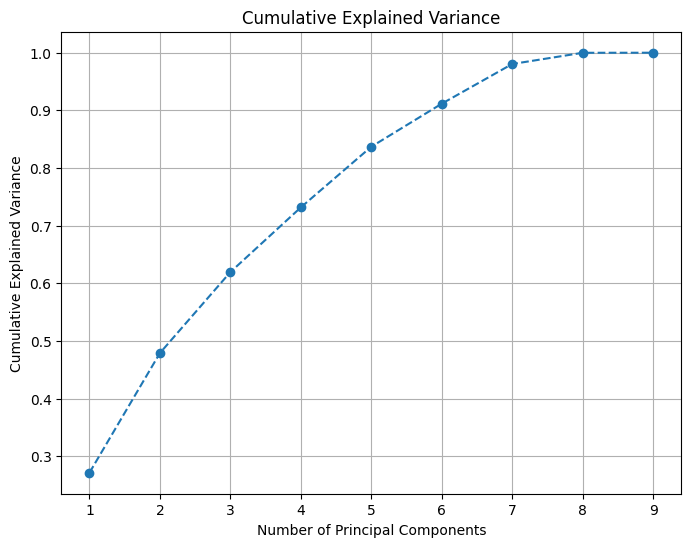

In [34]:
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

5/6 columns for 90%

## Now we apply PCA to Variation column

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Step 1: Select relevant numerical columns for PCA
columns_for_pca = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 
                   'bal', 'calls_6_mnth', 'logons_6_mnth', 'num_steps', 'confirm']

# Make sure there are no NaN values in the selected columns
df_pca = final_table[columns_for_pca].dropna()

# Scale the numerical data
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Step 2: Apply PCA with 5 components
optimal_components = 9
pca = PCA(n_components=optimal_components)
pca_components = pca.fit_transform(df_pca_scaled)

# Add the principal components back to the original table
df_pca_components = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(optimal_components)])
df_with_pca = pd.concat([final_table.reset_index(drop=True), df_pca_components], axis=1)

# Step 3: Train a classification model to predict 'Variation'
# Separate rows where 'Variation' is known from rows with NaN
df_train = df_with_pca[df_with_pca['Variation'].notna()]
df_predict = df_with_pca[df_with_pca['Variation'].isna()]

# Convert Variation to binary labels (Control=0, Test=1)
df_train['Variation'] = df_train['Variation'].map({'Control': 0, 'Test': 1})

# Features for classification (we'll use the principal components)
X = df_train[[f'PC{i+1}' for i in range(optimal_components)]]
y = df_train['Variation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set

# Calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy after hyperparameter tuning: {accuracy:.4f}")

C:\Users\VSPC\AppData\Local\Temp\ipykernel_22204\2032462502.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Variation'] = df_train['Variation'].map({'Control': 0, 'Test': 1})


Gradient Boosting model accuracy: 0.5354


In [36]:
df_with_pca['Variation'].value_counts()



Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [37]:
# Apply to variation

df_final_experiment_clients['Variation'] = df_final_experiment_clients['Variation'].map({'Test': 'Test', 'Control': 'Control'})
df_final_experiment_clients.loc[df_final_experiment_clients['Variation'].isna(), 'Variation'] = predictions

# Conver 1 to Test and 0 to Control

df_final_experiment_clients['Variation'] = df_final_experiment_clients['Variation'].map({1: 'Test', 0: 'Control', 'Test': 'Test', 'Control': 'Control'})


clean_variation_table = df_final_experiment_clients[['client_id', 'Variation']]

In [38]:
folder_path = r'C:\Users\VSPC\Documents\GitHub\New-Web-Study\data'

file_path = folder_path + "/df_experiment_non_nan.csv"

clean_variation_table.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")


File saved to: C:\Users\VSPC\Documents\GitHub\New-Web-Study\data/df_experiment_non_nan.csv
